# CC5215: Privacidad de Datos

## Laboratorio 6

Integrantes:

- Diego Espinoza 

PD: (trabajé solo, porque debido a que trabajo fuera de la u, no pude ir a clases y ver a mi compañero de siempre, que por lo demás está haciendo su tesis y tampoco parece ser que ha ido a las ultimas clases).

In [1]:
# Load the data and libraries
import pandas as pd
import numpy as np
import random
from scipy import stats
import matplotlib.pyplot as plt

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

adult = pd.read_csv('https://users.dcc.uchile.cl/~mtoro/cursos/cc5215/adult_with_pii.csv')

## Question 1 (6 points)

- Implement the Gaussian mechanism.
- How do the Laplace and Gaussian mechanisms compare in terms of relative error on the query "how many individuals are over 50 years old" with $\epsilon = 1$ and $\delta = 10^{-5}$?

In [2]:
def gaussian_mech(v, sensitivity, epsilon, delta):
    sigma = np.sqrt(2*np.log(1.25 / delta)) * 1 / epsilon
    noisy_query = v + np.random.normal(loc=0, scale=sigma)
    return noisy_query

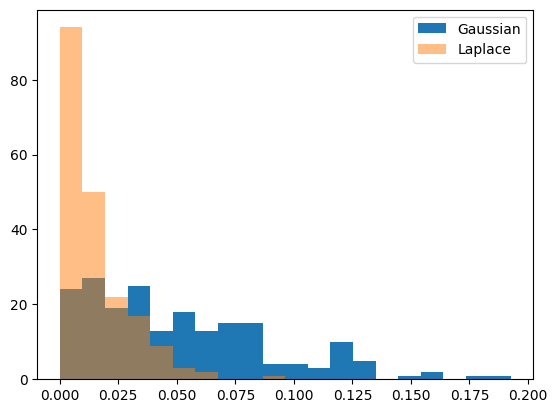

In [3]:
true_answer = len(adult[adult['Age'] > 50])

laplace_answers = [laplace_mech(true_answer, 1, 1) for _ in range(200)]
gaussian_answers = [gaussian_mech(true_answer, 1, 1, 10e-5) for _ in range(200)]

laplace_error = [pct_error(true_answer, a) for a in laplace_answers]
gaussian_error = [pct_error(true_answer, a) for a in gaussian_answers]

_, bins, _ = plt.hist(gaussian_error, bins=20, label='Gaussian')
plt.hist(laplace_error, bins=bins, label='Laplace', alpha=0.5)
plt.legend()

YOUR ANSWER HERE
Como podemos ver, para la consulta de saber cuántos adultos mayores a 50 con un presupuesto de privacidad $\epsilon$ igual a 1 y un $\delta$ de 0.00001, la dispersión de los errores del mecanismo Gaussiano es mayor que la dispersión de los errores del meceanismo de laplace (la desviación estándar). Además, podemos ver que la cantidad de datos en el caso del mecanismo de Laplace se acumulan en torno a cero, lo que quiere decir que tiene menor error (haciendo 200 consultas sobre la cantidad de personas mayores a 50 años) en promedio. 

## Question 2 (4 points)

The function `age_cdf` calculates the cumulative distribution function (CDF) of the ages in the adult dataset, expressed as a vector of counts.

What is the **L1 global sensitivity** of `age_cdf`? Justify your answer using the definition of the L1 norm, and the sensitivity of vectors.

In [ ]:
def age_cdf():
    a = adult['Age']
    return [len(a[a < i]) for i in range(100)]

plt.plot(age_cdf());
print('Length of CDF vector:', len(age_cdf()))

YOUR ANSWER HERE

## Question 3 (4 points)

- What is the **L2 global sensitivity** of `age_cdf`? Justify your answer using the definition of the L2 norm, and the sensitivity of vectors.
- How does the L2 global sensitivity compares to the L1 norm sensitivity of `age_cdf`?

## Range Queries

A *range query* counts the number of rows in the dataset which have a value lying in a given range. For example, "how many participants are between the ages of 21 and 33?" is a range query. A *workload* of range queries is just a list of range queries. The code below generates 100 random range queries over ages in the adult dataset.

In [ ]:
def range_query(df, col, a, b):
    return len(df[(df[col] >= a) & (df[col] < b)])

random_lower_bounds = [random.randint(1, 70) for _ in range(100)]
random_workload = [(lb, random.randint(lb, 100)) for lb in random_lower_bounds]
real_answers = [range_query(adult, 'Age', lb, ub) for (lb, ub) in random_workload]

print('First 5 queries: ', random_workload[:5])

## Question 4 (4 points)

Write code to answer a workload of range queries using `laplace_mech` and sequential composition. Your solution should have a **total privacy cost of epsilon**.

In [ ]:
def workload_laplace(workload, epsilon):
    raise NotImplementedError()

print('First 4 answers:', workload_laplace(random_workload, 1.0)[:4])

In [ ]:
errors = [abs(r_a - l_a) for (r_a, l_a) in zip(real_answers, workload_laplace(random_workload, 1.0))]
print('Average absolute error:', np.mean(errors))
assert np.mean(errors) > 50
assert np.mean(errors) < 200

## Question 5 (8 points)

Write code to answer a workload using `laplace_mech`. Your solution should *not* use sequential composition, and should have a total privacy cost of `epsilon`, justified by the vector-valued Laplace mechanism.

*Hint*: remember to use L1 global sensitivity.

In [ ]:
def workload_laplace_vec(workload, epsilon):
    raise NotImplementedError()

print('First 4 answers:', workload_laplace_vec(random_workload, 1.0)[:4])

In [ ]:
errors = [abs(r_a - l_a) for (r_a, l_a) in zip(real_answers, workload_laplace_vec(random_workload, 1.0))]
print('Average absolute error:', np.mean(errors))
assert np.mean(errors) > 50
assert np.mean(errors) < 200

## Question 6 (4 points)

In 2-5 sentences, answer the following:
- Did the two solutions differ in terms of their accuracy?
- How do they differ in terms of their use of composition properties of differential privacy?

YOUR ANSWER HERE

## Question 7 (8 points)

Write code to answer a workload using `gaussian_mech_vec` - the version of the Gaussian mechanism for vector-valued queries. Your solution should not use sequential composition, should satisfy $(\epsilon, \delta)$-differential privacy, and should have a total privacy cost of (`epsilon`, `delta`).

*Hint*: remember to use L2 sensitivity.

In [ ]:
def workload_gaussian_vec(workload, epsilon, delta):
    raise NotImplementedError()

print('First 4 answers:', workload_gaussian_vec(random_workload, 1.0, 1e-5)[:4])

In [ ]:
errors = [abs(r_a - l_a) for (r_a, l_a) in zip(real_answers, workload_gaussian_vec(random_workload, 1.0, 1e-5))]
print('Average absolute error:', np.mean(errors))
assert np.mean(errors) > 10
assert np.mean(errors) < 100

## Question 8 (6 points)

In 2-5 sentences, answer the following:
- Of your solutions in questions (4,5,7), which ones rely on *sequential composition*?
- Which solution offers the best accuracy?
- Why does this particular solution yield the best accuracy?

YOUR ANSWER HERE

## Question 9 (10 points)

Use advanced composition to achieve $(1, 10^{-5})$-DP using the laplace mechanism. Write code to calculate the $\epsilon_i$ for each iteration. Then, complete the function `workload_advcom_laplace` that receives the `epsilon_i` **for each iteration** (not the total epsilon).

_Hint_: You will have to calculate the $\epsilon_i$ for each iteration using the advanced composition theorem fixing $\delta' = 10^{-5}$ and $\epsilon' = 1$.

In [ ]:
# COMPLETE
delta_p = None
epsilon_p = None
k = None

epsilon_i = None

print('epsilon for each iteration:', epsilon_i)

In [ ]:
def workload_advcomp_laplace(workload, epsilon_i):
    raise NotImplementedError()

advcomp_answers = workload_advcomp_laplace(random_workload, epsilon_i)
print('First 4 answers:', advcomp_answers[:4])

In [ ]:
errors = [abs(r_a - l_a) for (r_a, l_a) in zip(real_answers, advcomp_answers)]
print('Average absolute error:', np.mean(errors))
assert np.mean(errors) > 50
assert np.mean(errors) < 200

## Question 10 (6 points)

In 2-5 sentences, answer the following:
- How does this solution compare to the result of question 4? Explain in terms of the used epsilons and the concepts seen in class.
- With $\delta'$ fixed in $10^{-5}$, what property of the workload (seen in class) favors the more accurate solution?
- What could we expect if the workload had 50 queries?

YOUR ANSWER HERE